### a. Download dataset and set-up the imports

In [7]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};

<IPython.core.display.Javascript object>

In [8]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier

import math

%matplotlib inline

### b. Build the feature matrix and label vector

In [9]:
def get_features_and_labels():
    features_and_labels = []
    
    df = pd.read_csv("label.csv")

    for i in range(0, df.shape[0]):
        file_name = df['name of the file'][i]
        full_file_name = "./Digit/" + str(file_name) + ".jpg"
        img = mpimg.imread(full_file_name)
        #flatten converts 2-D array to 1-D array row-wise
        img_flat = img.flatten()
        #Image path embedded in label and will be separated later on
        features_and_labels.append((img_flat, (df['digit'][i], full_file_name)))
        
    return map(list, zip(*features_and_labels))

### c. Use sklearn functions to split the dataset into testing and training sets

In [10]:
X, y_with_file_name = get_features_and_labels()

X_train, X_test, y_train_with_file_name, y_test_with_file_name = train_test_split(X, y_with_file_name, 
                                                                                  test_size=0.1, random_state=2)

#Collect only labels and leave out image file names
y_train = [y[0] for y in y_train_with_file_name]
y_test  = [y[0] for y in y_test_with_file_name]


### d.Use scikit-learn "Random Forest" classifier to recognize the hand-written digits

In [11]:
rf_classifier = RandomForestClassifier(n_estimators=19,bootstrap=True,random_state=2)

rf_classifier.fit(X_train, y_train)

y_result = rf_classifier.predict(X_test)

print("RandomForest Accuracy Score is {0}".format(accuracy_score(y_test, y_result)))
print()

conf_matrix = confusion_matrix(y_test, y_result)

print("Confusion matrix:")
print(conf_matrix)
print()

RandomForest Accuracy Score is 0.9277777777777778

Confusion matrix:
[[13  0  0  0  1  0  0  0  0  0]
 [ 0 22  0  0  0  0  0  0  0  0]
 [ 0  0 14  0  0  0  0  0  0  0]
 [ 0  0  1 20  0  0  0  1  0  0]
 [ 0  0  0  0 18  0  0  2  1  0]
 [ 0  0  0  0  0 16  0  0  0  0]
 [ 0  0  0  0  1  0 17  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0]
 [ 0  2  0  0  0  1  0  0 16  0]
 [ 0  0  0  0  0  2  0  1  0 13]]



### e.Find exactly which one of the data samples (i.e. which images) have been misclassified

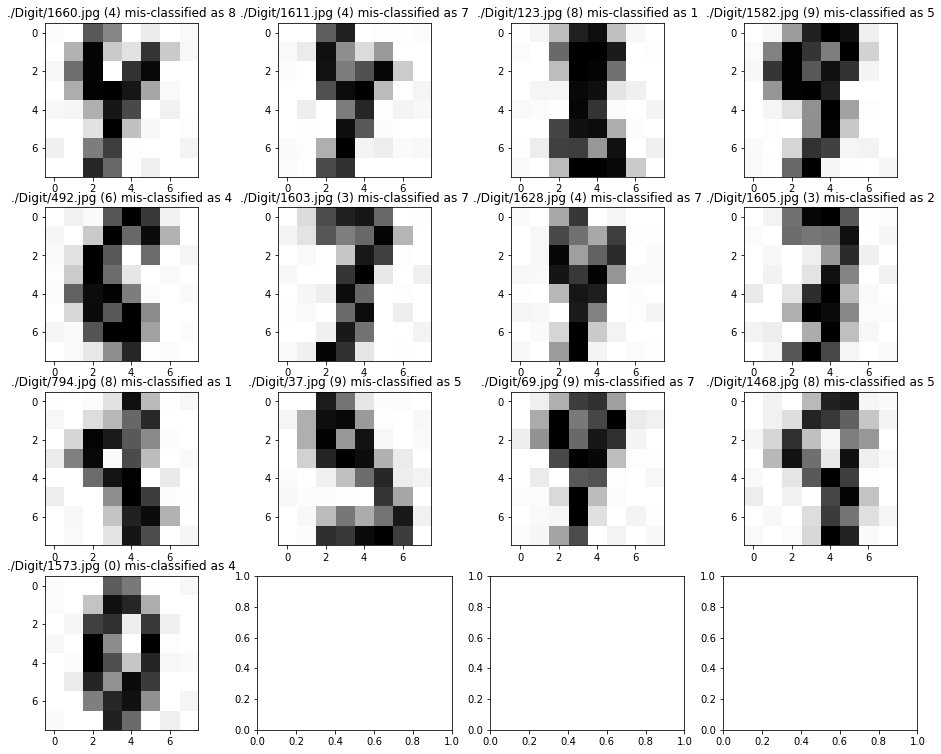

In [12]:
sub_plots = (y_result != y_test).sum()
fig, splot = plt.subplots(math.ceil(sub_plots/4), 4, figsize=(4 * 4, sub_plots))
index = 0
for i in range(0, len(y_result)):
        if (y_result[i] != y_test[i]):                      
            splot[math.trunc(index/4), index%4].set_title(y_test_with_file_name[i][1] 
                                                          + " (" + str(y_test[i]) + ") mis-classified as " 
                                                          + str(y_result[i]))
            splot[math.trunc(index/4), index%4].imshow(X_test[i].reshape(8,8), cmap=plt.cm.gray_r, 
                                                       interpolation='nearest')
            index += 1

## Question2

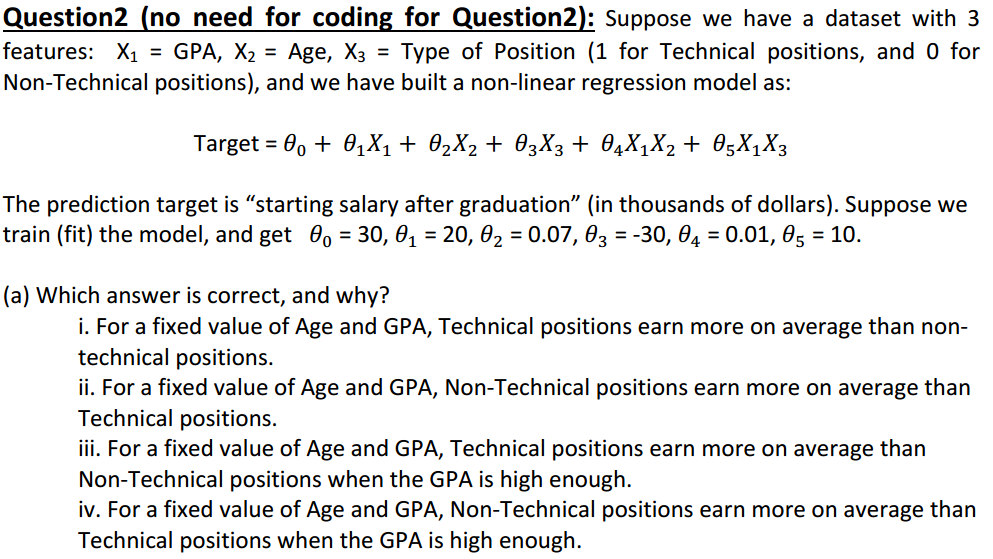

### (iii) For fixed age and gpa, technical positions earn more when gpa is high
#### The reason being, in the given linear equation, the position (X3) occurs twice. 
- In the independent term $\theta$3 * X3, $\theta$ is -30 and X3 can be 1 or 0. Hence technical positions with X3=1 can only have a negative impact.
- In the last term $\theta$5 * X1 * X3, $\theta$5 is positive 10, hence X3 can have a positive impact, provided X1 is > 1

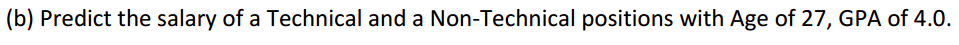

#### Target = 30 + 20 x 4 + 0.07 x 27 + (-30) x pos + 0.01*4*27 + 10 x 4 x pos
#### Target = 112.97 + 10 x pos
#### For technical position, Target = 122.97
#### For non-technical, Target = 112.97

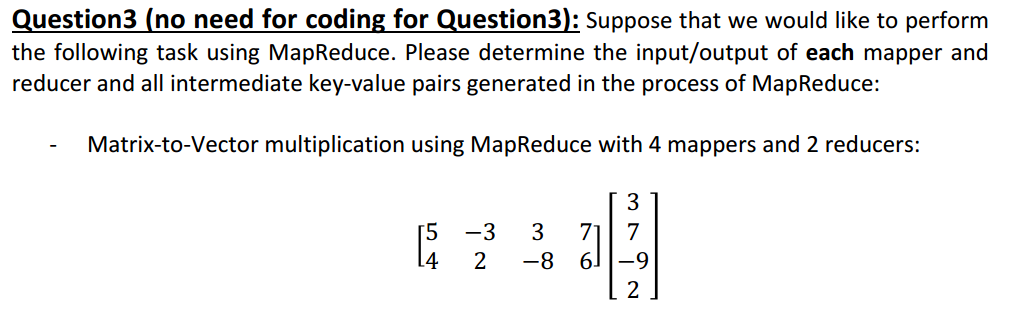

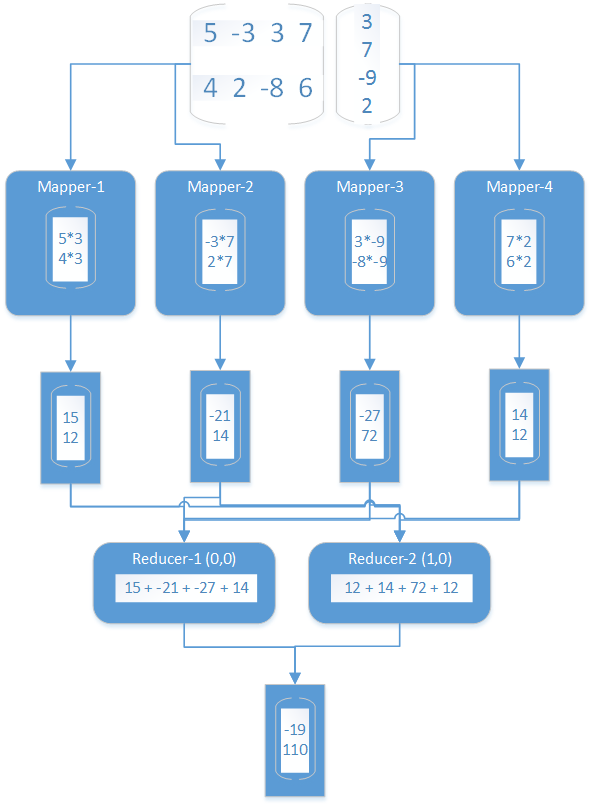